# **Initial Run**

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Exploration (Run)**

# **oBTAIN dATASET AND CONCATENATE**

In [ ]:
def process_custom_folder(custom_path):
    emotions = {'HAP': 'happy', 'SAD': 'sad', 'ANG': 'angry'}

    file_emotion = []
    file_path = []

    for root, _, files in os.walk(custom_path):
        for file in files:
            part = file.split('-')
            emotion = emotions.get(part[1], 'Unknown')
            file_emotion.append(emotion)
            file_path.append(os.path.join(root, file))

    emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
    path_df = pd.DataFrame(file_path, columns=['Path'])
    custom_df = pd.concat([emotion_df, path_df], axis=1)

    return custom_df

# Define your paths
customized_path_to_single = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_double = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_triple = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_fourth = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_fifth = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_sixth = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_seventh = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_eight = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_ninth = "/content/drive/MyDrive/Colz_Project/Project Dataset"
customized_path_to_tenth = "/content/drive/MyDrive/Colz_Project/Project Dataset"

# Process each custom folder
single_df = process_custom_folder(customized_path_to_single)
double_df = process_custom_folder(customized_path_to_double)
triple_df = process_custom_folder(customized_path_to_triple)
fourth_df = process_custom_folder(customized_path_to_fourth)
fifth_df = process_custom_folder(customized_path_to_fifth)
sixth_df = process_custom_folder(customized_path_to_sixth)

seventh_df = process_custom_folder(customized_path_to_seventh)
eight_df = process_custom_folder(customized_path_to_eight)
ninth_df = process_custom_folder(customized_path_to_ninth)
tenth_df = process_custom_folder(customized_path_to_tenth)

# Concatenate the results
# Total_df = pd.concat([single_df, double_df, triple_df,fourth_df,fifth_df,sixth_df,seventh_df,eight_df,ninth_df,tenth_df])
# Total_df = pd.concat([single_df, double_df, triple_df,fourth_df,fifth_df,sixth_df,seventh_df,eight_df,ninth_df])
Total_df = pd.concat([single_df, double_df, triple_df,fourth_df,fifth_df,sixth_df,seventh_df,eight_df])
# Total_df = pd.concat([single_df, double_df, triple_df,fourth_df,fifth_df,sixth_df])
# Total_df = pd.concat([single_df])

# Define custom order for emotions
custom_order = ['angry', 'happy', 'sad']

# Sort and reset index
Total_df['Emotions'] = pd.Categorical(Total_df['Emotions'], categories=custom_order, ordered=True)
Total_df.sort_values('Emotions', inplace=True)
Total_df.reset_index(drop=True, inplace=True)

In [ ]:
Single_df = pd.concat([single_df])

# Define custom order for emotions
custom_order = ['angry', 'happy', 'sad']

# Sort and reset index
Single_df['Emotions'] = pd.Categorical(Single_df['Emotions'], categories=custom_order, ordered=True)
Single_df.sort_values('Emotions', inplace=True)
Single_df.reset_index(drop=True, inplace=True)
Single_df['Emotions'].value_counts()

angry    156
happy    155
sad      142
Name: Emotions, dtype: int64

# **Data Visualisation and Exploration**

In [ ]:
Total_df['Emotions'].value_counts()

angry    1248
happy    1240
sad      1136
Name: Emotions, dtype: int64

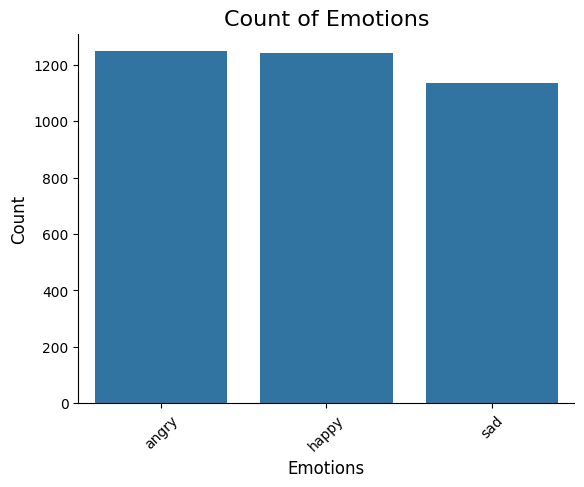

In [ ]:
emotion_counts = Total_df['Emotions'].value_counts()
plt.title('Count of Emotions', size=16)
sn.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sn.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

# **Feature extration without noise**

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(Total_df['Path'][0])

array([-3.3545691e+02,  1.0716609e+02,  1.2282484e+01,  1.6858618e+01,
        5.6708612e+00, -9.4943857e+00, -2.2980003e+01, -1.0159870e+01,
       -1.9998955e+01, -2.9610243e+00, -1.7921026e+01, -8.1803961e+00,
       -8.4168530e+00, -8.4961510e+00, -3.4292686e+00, -7.1278353e+00,
       -9.6054497e+00, -5.2263713e-01, -4.3525977e+00, -7.0342140e+00,
       -7.3958840e+00, -4.5200491e+00, -8.2013006e+00, -9.1609192e+00,
       -4.4578724e+00, -6.2741833e+00, -4.6869841e+00, -4.9448700e+00,
       -6.8090076e+00, -6.9386501e+00, -9.2961636e+00, -8.9846115e+00,
       -7.1051707e+00, -3.1209669e+00, -1.3323501e+00, -1.8934696e+00,
       -4.0476775e-01,  9.6385908e-01, -3.8542461e-01, -3.8017750e-02],
      dtype=float32)

In [ ]:
X_mfcc = Total_df['Path'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-335.4569, 107.16609, 12.282484, 16.858618, 5...
1       [-235.47725, 106.55053, 14.641189, 7.982081, -...
2       [-250.3925, 108.89542, 6.329525, 20.36826, -0....
3       [-244.11914, 128.38426, 5.8294, 24.819311, -5....
4       [-254.24203, 122.79472, -0.3921398, 33.569077,...
                              ...                        
3619    [-436.82898, 93.14208, 36.457317, 19.931135, -...
3620    [-394.7591, 120.906, 47.892788, 20.275606, -14...
3621    [-322.3493, 92.61464, 5.1986012, 11.296389, 18...
3622    [-342.38098, 85.56315, 13.26212, 20.18416, 6.9...
3623    [-334.63574, 76.56946, 6.426545, 16.223581, 20...
Name: Path, Length: 3624, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(3624, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(3624, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Total_df[['Emotions']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(3624, 3)

# **Split your dataset into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels for both clean and noisy data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.8, random_state=42)

# Further split the training set into training and validation sets
X_validation, X_test, y_validation, y_test =  train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (724, 40, 1)
y_train shape: (724, 3)
X_validation shape: (1450, 40, 1)
y_validation shape: (1450, 3)
X_test shape: (1450, 40, 1)
y_test shape: (1450, 3)


# **model**

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from keras.layers import *
from keras.regularizers import l2
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.losses import Loss
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [ ]:

# Define the checkpoint filepath on Google Drive
checkpoint_path = '/content/drive/MyDrive/Colz_Project/Extra Files'

# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# **Actual Model**

In [ ]:
# #Build sequential CNN
# model = Sequential()

# #Build first layer
# model.add(Conv1D(16, 5,padding='same',
#                  input_shape=(40, 1), activation='relu'))

# #Build second layer
# model.add(Conv1D(32, 5,padding='same',activation='relu'))

# #Build third layer
# model.add(Conv1D(64, 5,padding='same',activation='relu'))

# #Build forth layer
# model.add(Conv1D(128, 5,padding='same',activation='relu'))

# #Add dropout
# model.add(Dropout(0.2))

# #Flatten
# model.add(Flatten())

# model.add(Dense(128, activation ='relu'))
# # model.add(Dropout(0.25))
# model.add(Dense(64, activation ='relu'))
# model.add(Dense(64, activation ='relu'))
# model.add(Dense(3, activation='softmax'))

In [ ]:
model = Sequential()

model.add(Conv1D(16, 5,padding='same',input_shape=(40, 1), activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 5,padding='same',activation='relu'))
model.add(Conv1D(64, 5,padding='same',activation='relu'))
model.add(Conv1D(128, 5,padding='same',activation='relu'))
model.add(Conv1D(256, 5,padding='same',activation='relu'))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
# model.add(LSTM(32))
# model.add(Dropout(0.2))

model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# # to train without noise
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=120, batch_size=1024, validation_data=(X_validation, y_validation), callbacks=[checkpoint])

Epoch 1/120
1/1 [==============================] - ETA: 0s - loss: 1.1050 - accuracy: 0.3108
Epoch 1: val_accuracy did not improve from 0.94069
1/1 [==============================] - 9s 9s/step - loss: 1.1050 - accuracy: 0.3108 - val_loss: 1.0960 - val_accuracy: 0.3055
Epoch 2/120
1/1 [==============================] - ETA: 0s - loss: 1.1017 - accuracy: 0.3135
Epoch 2: val_accuracy did not improve from 0.94069
1/1 [==============================] - 2s 2s/step - loss: 1.1017 - accuracy: 0.3135 - val_loss: 1.0979 - val_accuracy: 0.2938
Epoch 3/120
1/1 [==============================] - ETA: 0s - loss: 1.0999 - accuracy: 0.3301
Epoch 3: val_accuracy did not improve from 0.94069
1/1 [==============================] - 3s 3s/step - loss: 1.0999 - accuracy: 0.3301 - val_loss: 1.0965 - val_accuracy: 0.2938
Epoch 4/120
1/1 [==============================] - ETA: 0s - loss: 1.0964 - accuracy: 0.3522
Epoch 4: val_accuracy did not improve from 0.94069
1/1 [==============================] - 2s 2s/s

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 40, 16)            96        
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 20, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 20, 32)            2592      
                                                                 
 conv1d_18 (Conv1D)          (None, 20, 64)            10304     
                                                                 
 conv1d_19 (Conv1D)          (None, 20, 128)           41088     
                                                                 
 conv1d_20 (Conv1D)          (None, 20, 256)           164096    
                                                      

In [ ]:
# Retrieve the best validation accuracy and the epoch at which it occurred
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy_epoch = history.history['val_accuracy'].index(best_val_accuracy)

print("Best Validation Accuracy:", best_val_accuracy)
print("Epoch with Best Validation Accuracy:", best_val_accuracy_epoch + 1)

Best Validation Accuracy: 0.8896551728248596
Epoch with Best Validation Accuracy: 116


In [ ]:
# # Save the model in HDF5 format
# model.save('/content/drive/MyDrive/Colz_Project/Extra Files/custom_2ndFeb.h5')

# # Load the model using load_model
# loaded_model = load_model('/content/drive/MyDrive/Colz_Project/Extra Files/custom_2ndFeb.h5')

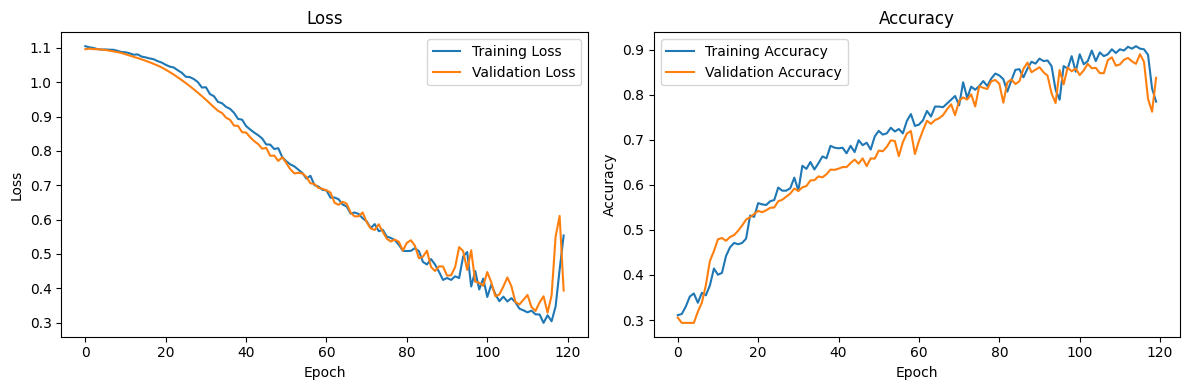

In [ ]:
# Get training and validation loss and accuracy from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.set_title('Loss')
ax1.plot(training_loss, label='Training Loss')
ax1.plot(validation_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.set_title('Accuracy')
ax2.plot(training_accuracy, label='Training Accuracy')
ax2.plot(validation_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.savefig('loss_accuracy.png')
plt.show()

46/46 [==============================] - 2s 22ms/step


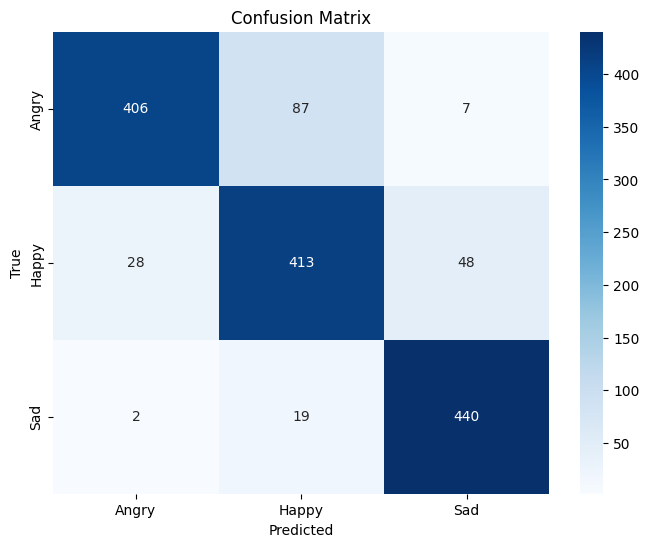

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded labels back to original labels
y_test_original = np.argmax(y_test, axis=1)
y_pred_original = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)

# Define class labels
class_labels = ['Angry', 'Happy', 'Sad']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Generate classification report
class_report = classification_report(y_test_original, y_pred_original)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       500
           1       0.80      0.84      0.82       489
           2       0.89      0.95      0.92       461

    accuracy                           0.87      1450
   macro avg       0.87      0.87      0.87      1450
weighted avg       0.87      0.87      0.87      1450



In [ ]:
import librosa
import numpy as np
from keras.models import load_model
import tensorflow as tf

# Function to preprocess audio
def preprocess_audio(filename, noise_level=0.01):
    # Load audio
    y, sr = librosa.load(filename, duration=3, offset=0.5)

    # Extract MFCC features
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    return mfcc

# Load the trained model
model_path = '/content/drive/MyDrive/Colz_Project/Extra Files/custom_2ndFeb.h5'
loaded_model = load_model(model_path)

# Define audio filenames
audio_filenames = [
    '/content/drive/MyDrive/Colz_Project/Project Dataset/Nihit/NIHIT-ANG-1.mp3'
]

# Iterate over audio filenames
for i, audio_filename in enumerate(audio_filenames):
    # Preprocess the audio
    preprocessed_audio = preprocess_audio(audio_filename)

    # Make predictions
    predicted_probabilities = loaded_model.predict(np.expand_dims(preprocessed_audio, axis=0))
    predicted_class = np.argmax(predicted_probabilities)

    # Map the predicted class to emotion
    class_to_emotion = {
        0: 'angry',
        1: 'happy',
        2: 'sad'
    }

    predicted_emotion = class_to_emotion[predicted_class]

    # Print the predicted emotion for each audio file
    print(f"Predicted Emotion for Audio {i + 1}: {predicted_emotion}")


1/1 [==============================] - 0s 141ms/step
Predicted Emotion for Audio 1: angry


In [ ]:
# import os
# import numpy as np

# # Assuming preprocess_audio and loaded_model are defined somewhere in your code

# # Directory containing audio files
# audio_directory = '/content/drive/MyDrive/Colz_Project/Project Dataset/'

# # Initialize counters
# total_files = 0
# files_with_ang_in_name = 0
# predicted_angry_count = 0
# predicted_angry_with_ang_in_name_count = 0
# files_with_sad_in_name = 0
# predicted_sad_count = 0
# predicted_sad_with_sad_in_name_count = 0
# files_with_hap_in_name = 0
# predicted_happy_count = 0
# predicted_happy_with_hap_in_name_count = 0

# # Iterate over all files in the directory and its subdirectories
# for root, _, files in os.walk(audio_directory):
#     for filename in files:
#         if filename.endswith(".mp3"):
#             # Update total files count
#             total_files += 1

#             # Check if "HAP", "ANG", or "SAD" is in the filename
#             if "HAP" in filename:
#                 files_with_hap_in_name += 1
#             if "ANG" in filename:
#                 files_with_ang_in_name += 1
#             if "SAD" in filename:
#                 files_with_sad_in_name += 1

#             # Preprocess the audio
#             audio_filepath = os.path.join(root, filename)
#             preprocessed_audio = preprocess_audio(audio_filepath)

#             # Make predictions
#             predicted_probabilities = loaded_model.predict(np.expand_dims(preprocessed_audio, axis=0))
#             predicted_class = np.argmax(predicted_probabilities)

#             # Map the predicted class to emotion
#             class_to_emotion = {
#                 0: 'angry',
#                 1: 'happy',
#                 2: 'sad'
#             }

#             predicted_emotion = class_to_emotion[predicted_class]

#             # Update counts for predicted emotions
#             if predicted_emotion == 'angry':
#                 predicted_angry_count += 1

#                 # Check if "ANG" is in the filename for predicted "angry" files
#                 if "ANG" in filename:
#                     predicted_angry_with_ang_in_name_count += 1

#             elif predicted_emotion == 'sad':
#                 predicted_sad_count += 1

#                 # Check if "SAD" is in the filename for predicted "sad" files
#                 if "SAD" in filename:
#                     predicted_sad_with_sad_in_name_count += 1

#             elif predicted_emotion == 'happy':
#                 predicted_happy_count += 1

#                 # Check if "HAP" is in the filename for predicted "happy" files
#                 if "HAP" in filename:
#                     predicted_happy_with_hap_in_name_count += 1

#             # Print the filename and predicted emotion
#             print(f"Predicted Emotion for {filename}: {predicted_emotion}")

# # Print the summary counts
# print(f"Total Files: {total_files}")
# print(f"Files with 'ANG' in Name: {files_with_ang_in_name}")
# print(f"Predicted 'Angry' Files: {predicted_angry_count}")
# print(f"Predicted 'Angry' Files with 'ANG' in Name: {predicted_angry_with_ang_in_name_count}")
# print("____________________________________________________")
# print(f"Files with 'SAD' in Name: {files_with_sad_in_name}")
# print(f"Predicted 'Sad' Files: {predicted_sad_count}")
# print(f"Predicted 'Sad' Files with 'SAD' in Name: {predicted_sad_with_sad_in_name_count}")
# print("____________________________________________________")
# print(f"Files with 'HAP' in Name: {files_with_hap_in_name}")
# print(f"Predicted 'Happy' Files: {predicted_happy_count}")
# print(f"Predicted 'Happy' Files with 'HAP' in Name: {predicted_happy_with_hap_in_name_count}")
